In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
dfs = df.sample(n=len(df),random_state=1)
dfs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4752,-118.08,33.85,19.0,4261.0,678.0,2621.0,661.0,6.2427,288700.0
13348,-121.93,37.73,23.0,2564.0,347.0,1043.0,351.0,6.2048,275000.0
13459,-121.95,37.32,39.0,1164.0,199.0,619.0,231.0,4.6304,263200.0
6691,-118.29,34.07,22.0,492.0,269.0,634.0,261.0,1.6406,300000.0
12750,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0
...,...,...,...,...,...,...,...,...,...
7813,-118.39,34.04,44.0,1873.0,286.0,635.0,283.0,5.5951,461300.0
10955,-120.89,37.59,33.0,1016.0,206.0,617.0,209.0,2.1510,195800.0
5192,-118.13,33.86,37.0,2259.0,425.0,1183.0,413.0,5.1805,201600.0
12172,-121.45,38.52,37.0,1477.0,321.0,888.0,312.0,2.5592,70300.0


In [ ]:
dfs = dfs.dropna()
len(dfs)


17000

In [ ]:
dfs_train,dfs_test,dfs_val=dfs[:15000],dfs[15000:16000],dfs[16000:]
len(dfs_train),len(dfs_test),len(dfs_val)

(15000, 1000, 1000)

In [ ]:
x_train, y_train = dfs_train.to_numpy()[:, :-1] , dfs_train.to_numpy()[:,-1]
x_test, y_test = dfs_test.to_numpy()[:, :-1] , dfs_test.to_numpy()[:,-1]
x_val, y_val = dfs_val.to_numpy()[:, :-1] , dfs_val.to_numpy()[:,-1]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((15000, 8), (15000,), (1000, 8), (1000,), (1000, 8), (1000,))

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(x_train[:,:])

def preprocessor(x):
  A = np.copy(x)
  A[:,:] = scaler.transform(A[:,:])
  return A

x_train,x_test,x_val = preprocessor(x_train),preprocessor(x_test),preprocessor(x_val)



array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

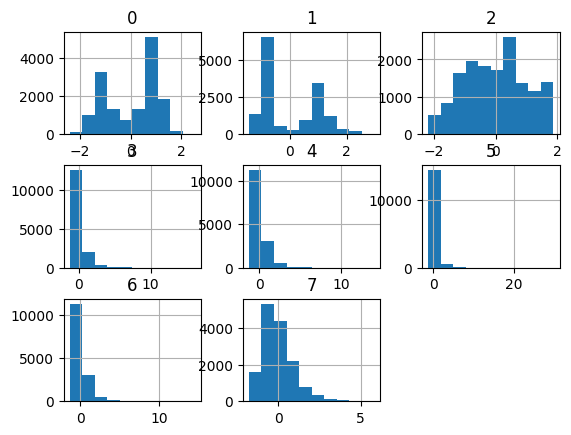

In [ ]:
pd.DataFrame(x_train).hist()

In [ ]:
# sum ((y_hat(x) - y)^2)/n
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
mse(lm.predict(x_train), y_train, squared=False),mse(lm.predict(x_train), y_train, squared=False)


(69358.31252387674, 69358.31252387674)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)
mse(knn.predict(x_train), y_train, squared=False),mse(knn.predict(x_train), y_train, squared=False)

(55249.683072055275, 55249.683072055275)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(x_train,y_train)
mse(rfr.predict(x_train), y_train, squared=False),mse(rfr.predict(x_train), y_train, squared=False)

(41739.12885450415, 41739.12885450415)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(x_train,y_train)
mse(gbr.predict(x_train), y_train, squared=False),mse(gbr.predict(x_train), y_train, squared=False)

(46065.34045584972, 46065.34045584972)

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((8,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=10)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
469/469 [==============================] - 5s 6ms/step - loss: 7413287936.0000 - root_mean_squared_error: 86100.4531 - val_loss: 4214148608.0000 - val_root_mean_squared_error: 64916.4727
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 4717676032.0000 - root_mean_squared_error: 68685.3438 - val_loss: 4382053888.0000 - val_root_mean_squared_error: 66197.0859
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 4645132800.0000 - root_mean_squared_error: 68155.2109 - val_loss: 4703602176.0000 - val_root_mean_squared_error: 68582.8125
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 4641459712.0000 - root_mean_squared_error: 68128.2578 - val_loss: 4275095296.0000 - val_root_mean_squared_error: 65384.2148
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 4679670784.0000 - root_mean_squared_error: 68408.1172 - val_loss: 4417195008.0000 - val_root_mean_squared_error: 66461.9844
Epoch

In [ ]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(x_train), y_train, squared=False), mse(simple_nn.predict(x_val), y_val, squared=False)

32/32 [==============================] - 0s 1ms/step


(65681.31270137242, 63722.158537908224)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((8,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
469/469 [==============================] - 4s 6ms/step - loss: 11769871360.0000 - root_mean_squared_error: 108489.0391 - val_loss: 4324767232.0000 - val_root_mean_squared_error: 65762.9609
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 4486464000.0000 - root_mean_squared_error: 66981.0703 - val_loss: 4208281344.0000 - val_root_mean_squared_error: 64871.2656
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 4373973504.0000 - root_mean_squared_error: 66136.0234 - val_loss: 4133102592.0000 - val_root_mean_squared_error: 64289.2109
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 4334471168.0000 - root_mean_squared_error: 65836.7031 - val_loss: 4109181184.0000 - val_root_mean_squared_error: 64102.8945
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 4259397632.0000 - root_mean_squared_error: 65264.0625 - val_loss: 4091576832.0000 - val_root_mean_squared_error: 63965.4336
Epo

In [ ]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(x_train), y_train, squared=False), mse(medium_nn.predict(x_val), y_val, squared=False)

32/32 [==============================] - 0s 2ms/step


(54788.80336595301, 54736.02710277576)

In [ ]:
large_nn = Sequential()
large_nn.add(InputLayer((8,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
469/469 [==============================] - 5s 5ms/step - loss: 6552298496.0000 - root_mean_squared_error: 80946.2656 - val_loss: 10204625920.0000 - val_root_mean_squared_error: 101017.9453
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 4662298112.0000 - root_mean_squared_error: 68281.0234 - val_loss: 3782924032.0000 - val_root_mean_squared_error: 61505.4805
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 4392287232.0000 - root_mean_squared_error: 66274.3359 - val_loss: 6062577152.0000 - val_root_mean_squared_error: 77862.5547
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 3993042944.0000 - root_mean_squared_error: 63190.5273 - val_loss: 4297338880.0000 - val_root_mean_squared_error: 65554.0938
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 3865496320.0000 - root_mean_squared_error: 62173.1172 - val_loss: 3522174720.0000 - val_root_mean_squared_error: 59347.9141
Epo

In [ ]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(x_train), y_train, squared=False), mse(large_nn.predict(x_val), y_val, squared=False)

32/32 [==============================] - 0s 2ms/step


(45824.30832472296, 48746.51635108942)

In [ ]:
mse(gbr.predict(x_test), y_test, squared=False)

49879.300914835585